<a href="https://colab.research.google.com/github/Ssergeymiss/Med_Text_Cluster/blob/main/Med_text_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import nltk

In [2]:
df=pd.read_csv("/content/Rinc.csv",on_bad_lines='skip')
df.head()

,Title;;;;;;
0,Природный фактор риска чрезвычайных ситуаций к...
1,Возможности здравоохранения зон риска Республи...
2,Медико-тактический прогноз техногенных и приро...
3,"Купирование болевого синдрома аппаратом ""Диа Д..."
4,ОРГАНИЗАЦИОННЫЕ И ПСИХОЛОГИЧЕСКИЕ АСПЕКТЫ ПОИС...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title;;;;;;  3220 non-null   object
dtypes: object(1)
memory usage: 25.3+ KB


Очистка текста от неалфавитных символов. Функция re.sub позволяет заменить все, что подходит под шаблон на указанную строку. Например, вот так можно заменить все, что не является словами на пробелы:

re.sub("[^a-zA-Z]"," ",text)

Токенизация. Данный метод позволяет разделить текст на так называемые токены, то есть на слова или предложения.

nltk.word_tokenize(text,language = "english")

In [4]:
lemmatize = nltk.WordNetLemmatizer()

Лемматизация. Позволяет привести словоформу к лемме — ее нормальной (словарной) форме. Другими словами, лемматизация схожа с выделением основы каждого слова в предложении. Она обычно выполняется простым поиском форм в таблице. Кроме того, можно добавить некоторые пользовательские правила для анализа слов.

lemmatize = nltk.WordNetLemmatizer()
lemmatize.lemmatize(word) for word in text

Удаление стоп-слов. Под стоп-словами обычно понимаются артикли, междометия, союзы и т.д., которые не несут смысловой нагрузки. При применении алгоритмов машинного обучения такие слова могут добавить много шума, поэтому лучше избавляться от них. В NLTK есть предустановленный список стоп-слов.

lemmatize.lemmatize(word) for word in text if not word in set(stopwords.words("stopwords"))

Векторизация текста или преобразование текста в численную форму. Алгоритмы машинного обучения не умеют работать с текстом, поэтому необходимо превратить текст в цифры. Данная стратегия называется представлением «Мешок слов». Документы описываются вхождениями слов, при этом полностью игнорируется информация об относительном положении слов в документе. По мешку слов находят количество появлений каждого слова во всем тексте. 

В пакете scikit-learn есть модуль CountVectorizer, который преобразовывает входной текст в матрицу, значениями которой являются количества вхождения данного ключа(слова) в текст. Таким образом, мы получим матрицу, размерность которой будет равна количеству всех слов, умноженных на количество документов. И элементами матрицы будут числа, которые означают, сколько раз всего слово встретилось в тексте.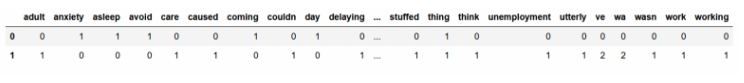

Также популярным методом для векторизации текста является метод TF-IDF, который является статистической мерой для оценки важности слова в документе.

В тексте большого объема некоторые слова могут присутствовать очень часто, но при этом не нести никакой значимой информации о фактическом содержании текста (документа). Если такие данные передавать непосредственно классификатору, то такие частые термины могут затенять частоты более редких, но при этом более интересных терминов. Для того, чтобы этого избежать, достаточно разделить количество употреблений каждого слова в документе на общее количество слов в документе, это есть TF — частота термина. Термин IDF (inverse document frequency) обозначает обратную частоту термина (инверсия частоты) с которой некоторое слово встречается в документах. IDF позволяет измерить непосредственную важность термина.
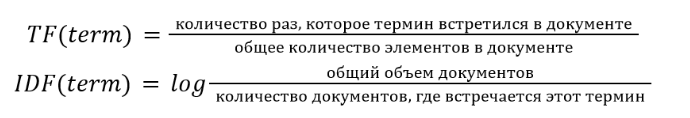

Тогда TF-IDF вычисляется следующим образом:

TF-IDF(term)=TF(term)*IDF(term)

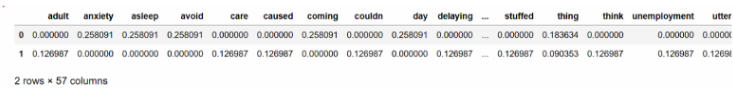

 итоге код по работе с текстом выглядит следующим образом

In [5]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
pdf=pd.DataFrame()

In [7]:
clean_text=[]

In [83]:
from nltk.corpus import stopwords

nltk.download("stopwords")

stopwords_ = set(stopwords.words("russian"))

for i in range(len(df["Title;;;;;;"])):

  sample_text = df["Title;;;;;;"][i]
  tokens = sample_text.split()
  clean_tokens = [t for t in tokens if not t in stopwords_]
  clean_tx = " ".join(clean_tokens)
  clean_text.append(clean_tx)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
pdf["Title"]=clean_text

In [10]:
pdf["Title"].head(10)

0    Природный фактор риска чрезвычайных ситуаций и...
1    Возможности здравоохранения зон риска Республи...
2    Медико-тактический прогноз техногенных природн...
3    Купирование болевого синдрома аппаратом "Диа Д...
4    ОРГАНИЗАЦИОННЫЕ И ПСИХОЛОГИЧЕСКИЕ АСПЕКТЫ ПОИС...
5    ОРГАНИЗАЦИЯ ЛИКВИДАЦИИ МЕДИКОСАНИТАРНЫХ ПОСЛЕД...
6    ОРГАНИЗАЦИЯ ПСИХОЛОГО-ПСИХИАТРИЧЕСКОЙ ПОМОЩИ П...
7    ОРГАНИЗАЦИЯ ПСИХОЛОГИЧЕСКОГО ОБЕСПЕЧЕНИЯ ПОСТР...
8    ОПЫТ РАБОТЫ ПСИХОЛОГИЧЕСКОЙ СЛУЖБЫ СГМУ ПО ОКА...
9    ПРАВОВАЯ ЗАЩИТА ЗДОРОВЬЯ ГРАЖДАН ПРИ ЧРЕЗВЫЧАЙ...
Name: Title, dtype: object

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
from string import punctuation
stopwords =stopwords.words("russian")


In [13]:
def preprocess_text(text):
    
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r"https?://\S+", "", text)
    text=  re.sub(r"<a[^>]*>(.*?)</a>", r"\1", text)
    text=  re.sub(r"<p[^>]*>(.*?)</p>", r"\1", text)
    text = " ".join(text.split())
    text = re.sub(r"\b[0-9]+\b\s*", "", text)
    text =" ".join([w for w in text.split() if w.isalpha()])
    text = re.sub(r"[^A-Za-z0-9\s]+", "", text)
    text = nltk.word_tokenize(text,language = "russian")
    

    return text



In [14]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 63.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=5cd955e5c9de95d8a62703462088d7d4af3f24e7472e31fd53f15c502a250f8a
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [15]:
from pymorphy2 import MorphAnalyzer

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"

morph = MorphAnalyzer()

def lemmatizer(doc):
    
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

In [16]:
import re

In [17]:
new_text=[]

In [18]:
new_text = df["Title;;;;;;"].apply(lemmatizer)

In [ ]:
#new_text = pdf["Title"].apply(preprocess_text)

In [19]:
df["Title;;;;;;"][1]

'Возможности здравоохранения зон риска Республики Татарстан по оказанию экстренной медицинской помощи пострадавшим в чрезвычайных ситуациях с термомеханической травмой (экспертная оценка);;;;;;'

In [20]:
new_text[1]

['возможность',
 'здравоохранение',
 'зона',
 'риск',
 'республика',
 'татарстан',
 'оказание',
 'экстренный',
 'медицинский',
 'помощь',
 'пострадать',
 'чрезвычайный',
 'ситуация',
 'термомеханический',
 'травма',
 'экспертный',
 'оценка']

In [21]:
clean = [x for x in new_text if x is not None]

In [22]:
len(clean)

3201

In [40]:
now_text=[]

In [41]:
for i in clean:
  x=",".join(i)
  now_text.append(x)

In [25]:
now_text[1]

'возможность,здравоохранение,зона,риск,республика,татарстан,оказание,экстренный,медицинский,помощь,пострадать,чрезвычайный,ситуация,термомеханический,травма,экспертный,оценка'

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)

matrix = tfidf_vectorizer.fit_transform(now_text)

In [43]:
len(now_text)

3201

In [35]:
matrix.shape

(3201, 3914)

In [44]:
X=matrix.todense()

In [45]:
X_wcss = np.asarray(X)

Text(0, 0.5, 'WCSS')

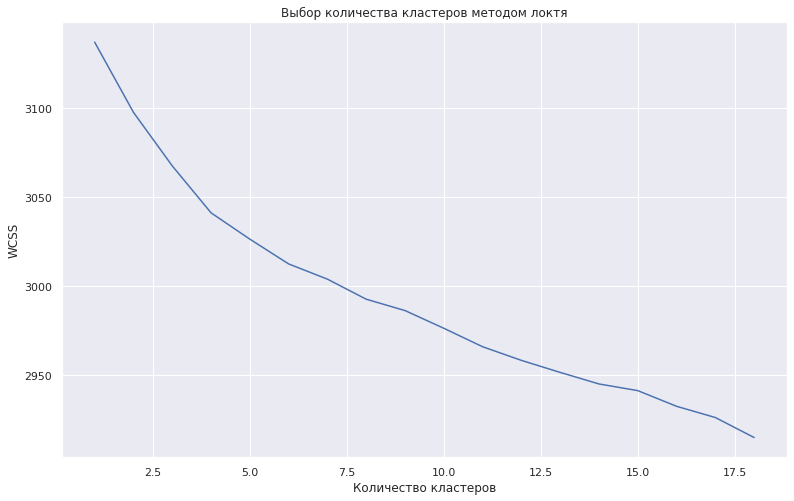

In [60]:
# импортируем нужный класс
from sklearn.cluster import KMeans
 
# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []
 
# воспользуемся новой для нас функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 19
for i in range(1, 19):
    
    # настроим параметры модели (подробнее об этом расскажу чуть дальше)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(X_wcss)
 
    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)
 
# зададим размер график
plt.figure(figsize = (13,8))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 19), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

In [48]:
from sklearn.cluster import KMeans

In [61]:
num_cluster=19


In [62]:
km=KMeans(n_clusters=num_cluster)

In [63]:
labels = km.fit_predict(matrix)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
labels[0:100]

array([ 4, 13, 15, 15,  8,  5,  6, 17, 17, 15,  0, 15,  3,  9,  1,  3,  5,
        3, 17, 14, 14,  5, 13, 15,  6,  6, 15, 15,  3,  1,  3,  5, 12,  8,
        0,  1,  8,  1,  3,  1,  1,  1,  3,  6,  5, 16, 15, 12, 13, 13,  3,
        3, 14, 15,  1,  6, 15, 13, 15,  3,  5, 14,  3, 15,  5,  3,  6,  3,
       15,  4, 15,  3, 14,  1,  3,  1,  3,  4, 12,  8, 15,  3, 15, 15,  1,
        3,  6,  3, 15, 11,  3,  9, 13, 13,  3, 15,  1,  1, 17,  1],
      dtype=int32)

In [67]:
dif=pd.DataFrame()
dif["Labels"]=labels

In [68]:
dif["Labels"].value_counts()

3     811
15    424
1     286
13    194
12    186
14    164
5     151
16    131
4     127
8      97
6      91
17     88
9      81
7      78
0      74
11     64
10     56
18     51
2      47
Name: Labels, dtype: int64

<AxesSubplot:xlabel='Labels', ylabel='count'>

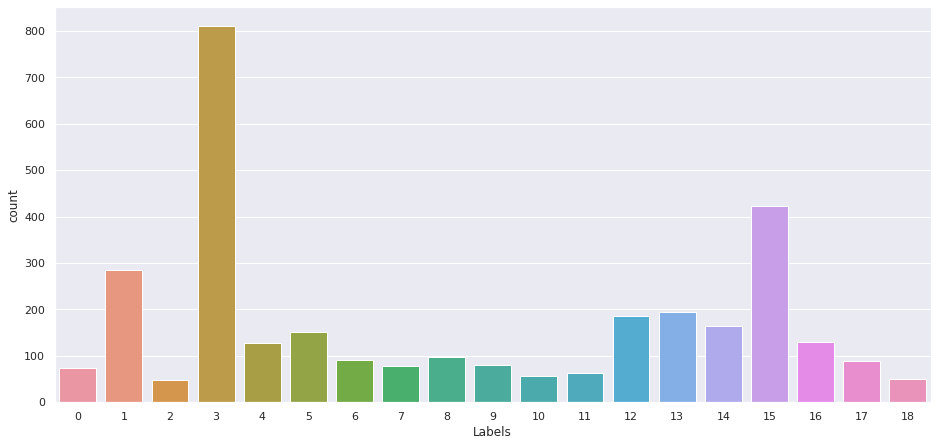

In [69]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,7.27)})
sns.countplot(data=dif, x="Labels")

In [70]:
dif["title"]=df["Title;;;;;;"]

In [71]:
dif.head(7)

,Labels,title
0,4,Природный фактор риска чрезвычайных ситуаций к...
1,13,Возможности здравоохранения зон риска Республи...
2,15,Медико-тактический прогноз техногенных и приро...
3,15,"Купирование болевого синдрома аппаратом ""Диа Д..."
4,8,ОРГАНИЗАЦИОННЫЕ И ПСИХОЛОГИЧЕСКИЕ АСПЕКТЫ ПОИС...
5,5,ОРГАНИЗАЦИЯ ЛИКВИДАЦИИ МЕДИКОСАНИТАРНЫХ ПОСЛЕД...
6,6,ОРГАНИЗАЦИЯ ПСИХОЛОГО-ПСИХИАТРИЧЕСКОЙ ПОМОЩИ П...


In [58]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
dif.to_excel (r'/content/StatesN.xlsx')

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
text_raw = " ".join(now_text)

In [74]:
text_raw[:102]

'природный,фактор,риск,чрезвычайный,ситуация,интегральный,составлять,санитарный,потеря,население,регион'

In [75]:
wordcloud = WordCloud(background_color = "white",
               max_words = 2000, max_font_size = 500,
               random_state = 42).generate(text_raw)

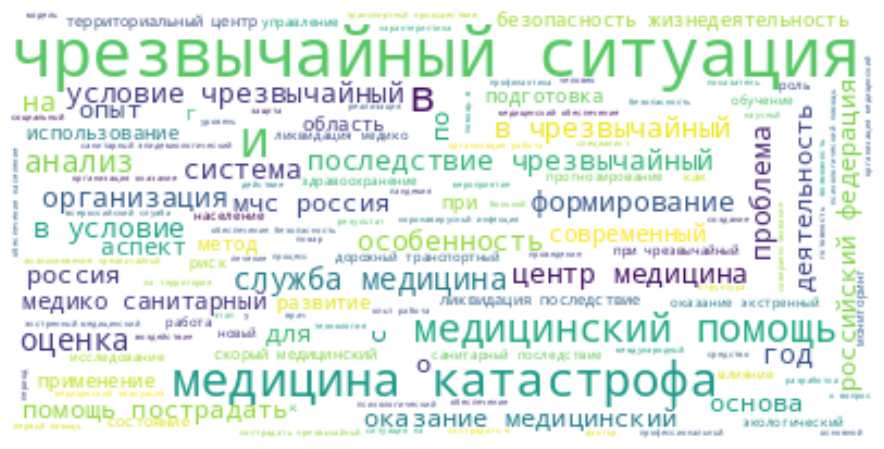

In [76]:
plt.figure(figsize=(18,8))
# plot words
plt.imshow(wordcloud, interpolation="bilinear")
# remove axes
plt.axis("off")
# show the result
plt.show()

In [77]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [78]:
num_clusters = 19
num_seeds = 19
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d',9: '#d9d9d9', 10: '#000000', 11: '#f07373', 12: '#dde4e1', 13: '#ff5073', 14: '#dd0404',
    15: '#cccccc', 16: '#aaaaaa', 17: '#f7f7f7', 18: '#9f9f9f'
}

In [79]:
pca_num_components = 2
tsne_num_components = 2

In [80]:
X=np.asarray(X)

In [81]:
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)

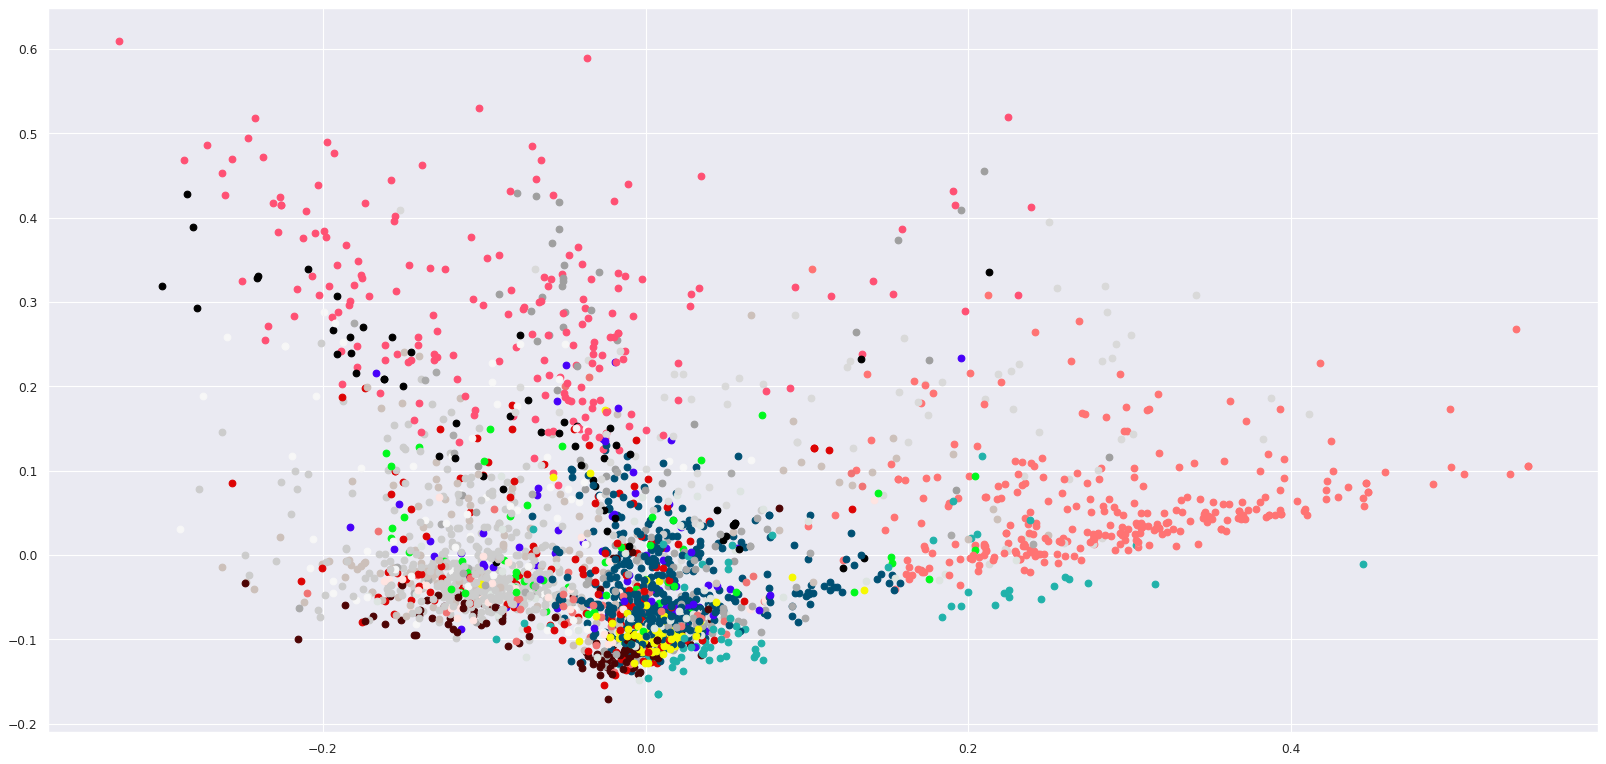

In [82]:
# print reduced_data
plt.figure(figsize=(25, 12), dpi=80)
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    
    plt.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()